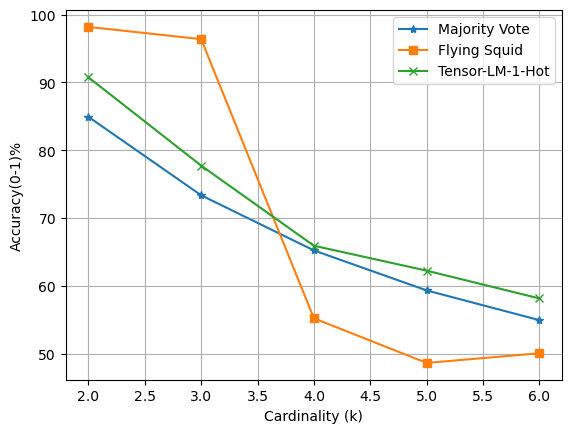

In [1]:
import matplotlib.pyplot as plt 
import json 
import os 

def read(fpath):
    s = ""
    with open(fpath,'r') as f:
        s= f.read()
    return s 

out_dir = '../../outputs/cg_runs/5/'
fpaths = os.listdir(out_dir)
fpaths  = [out_dir+fpath for fpath in fpaths]

outs = [json.loads(read(fpath)) for fpath in fpaths ]

import pandas as pd 
df = pd.DataFrame(outs)
#df.head()
lst_k = sorted(df['k'].unique())
M = df.groupby('k').mean()
S = df.groupby('k').std()
M
lst_k = sorted(df['k'].unique())
M = df.groupby('k').mean()
S = df.groupby('k').std()

plt.plot(M['acc_mv'][:5]*100,label='Majority Vote',marker='*')
plt.plot(M['acc_fs'][:5]*100,label='Flying Squid',marker='s')
plt.plot(M['acc_1_hot'][:5]*100,label='Tensor-LM-1-Hot',marker='x')
plt.legend()
plt.xlabel('Cardinality (k)')
plt.ylabel('Accuracy(0-1)%')
plt.grid()

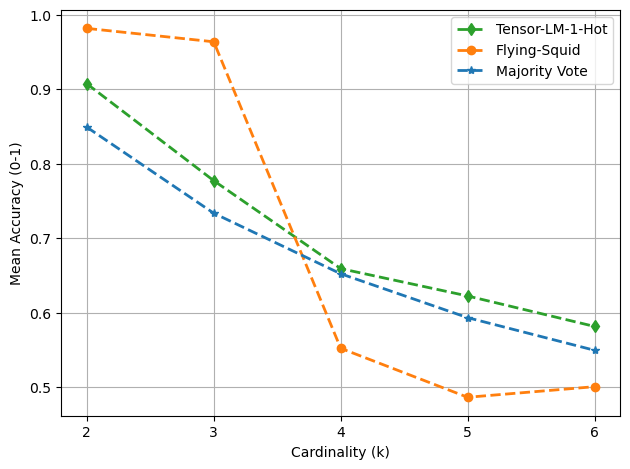

In [4]:
import numpy as np 

#plt.plot(M['acc_pse'],label='Tensor-LM-PSE',marker='s',linestyle='--',color='tab:red',linewidth=2)
plt.plot(M['acc_1_hot'][:5],label='Tensor-LM-1-Hot',marker='d',linestyle='--',color='tab:green',linewidth=2)
plt.plot(M['acc_fs'][:5],label='Flying-Squid',marker='o',linestyle='--',color='tab:orange',linewidth=2)
plt.plot(M['acc_mv'][:5],label='Majority Vote',marker='*',linestyle='--',color='tab:blue',linewidth=2)

plt.legend()
plt.xlabel('Cardinality (k)')
plt.ylabel('Mean Accuracy (0-1)')
plt.xticks(np.arange(2,7,1))
#plt.ylim(0.55,0.9)
plt.grid()
plt.tight_layout()
plt.savefig('../../plots/figure_mean_acc_cg_all.jpg',dpi=400)

